# Day 14 : Regolith Reservoir   
--------
This is my solution of [day 14](https://adventofcode.com/2022/day/14).

In [298]:
### Import function and Data
%run get_script.py 
from Script import input_as_lines
import re
import numpy as np

print(f"input_as_lines\n{input_as_lines.__doc__}")
data = input_as_lines("Day_14.txt")

input_as_lines
Return a list where each line in the input file is an element of the list


## Part One

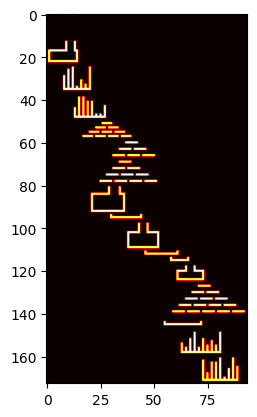

In [299]:
### Create the cave 

def extract_coord(text:str)->tuple:
    x,y = re.findall("\d+", text)
    return (int(x), int(y))

rock = []
for line in data:
    rock.append(list(map(extract_coord, line.split(" -> "))))

cave = np.zeros((600,600))

for r in rock:
    for i in range(0, len(r)-1):
        y1,x1 = r[i]
        y2,x2 = r[i+1]

        xmin = min(x1, x2)
        xmax = max(x1, x2)  
        ymin = min(y1, y2)
        ymax = max(y1, y2)

        cave[xmin:(xmax+1), ymin:(ymax+1)] = 1

indices = np.where(cave!=0)
cave_reduced = cave[0:indices[0].max()+2, indices[1].min()-1:indices[1].max()+2]
sand_arrival = (0, 500-(indices[1].min()-1))

import matplotlib.pyplot as plt
cave_plot = cave_reduced.copy()
cave_plot[sand_arrival] = 0.5
plt.imshow(cave_plot,  cmap='hot')    
plt.show()

After 300 step


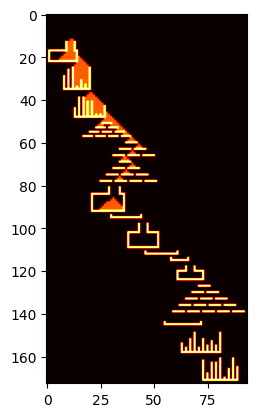

After 600 step


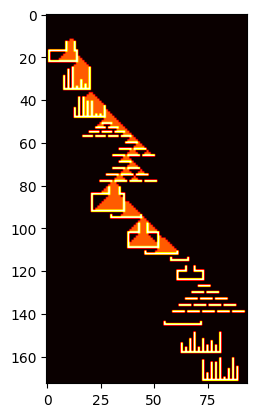

After 900 step


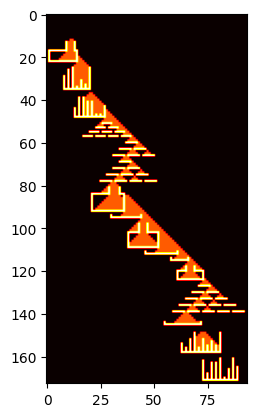

Stop after 1068 steps


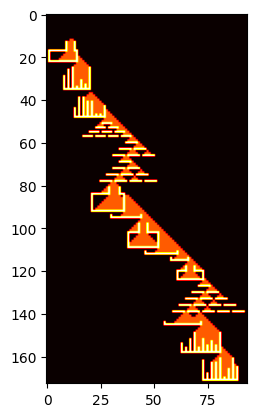

In [300]:
def move_sand(cave_reduced, sand:list):
    while True:
        # Condition to stop
        if sand[0]==cave_reduced.shape[0]-1:
            return cave_reduced, True # END

        if cave_reduced[sand[0]+1, sand[1]] == 0:
            sand[0] = sand[0] + 1
        else:
            if (cave_reduced[sand[0]+1, sand[1]-1]!=0) and (cave_reduced[sand[0]+1, sand[1]+1]!=0): # Plancher
                cave_reduced[sand[0], sand[1]] = 0.5
                return cave_reduced, False # END
            elif (cave_reduced[sand[0]+1, sand[1]-1]!=0): # Semi-plancher à gauche
                sand = [sand[0]+1, sand[1]+1]
                return move_sand(cave_reduced, sand)
            else:
                sand = [sand[0]+1, sand[1]-1]
                return move_sand(cave_reduced, sand)

i=0
while True:  
    cave_reduced, is_ended = move_sand(cave_reduced, list(sand_arrival))
    if is_ended:
        print(f"Stop after {i} steps")
        plt.imshow(cave_reduced,  cmap='hot')    
        plt.show()
        break
    i+=1

    if i%300==0:
        print(f"After {i} step")
        plt.imshow(cave_reduced,  cmap='hot')    
        plt.show()

## Part Two

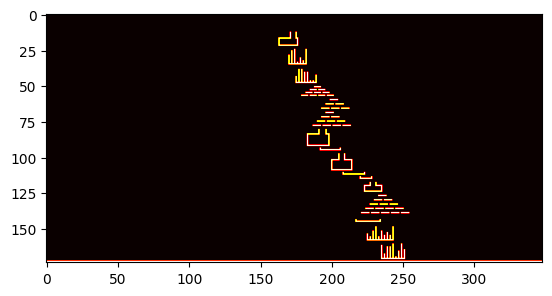

In [310]:
cave = np.zeros((600,2000))

for r in rock:
    for i in range(0, len(r)-1):
        y1,x1 = r[i]
        y2,x2 = r[i+1]

        xmin = min(x1, x2)
        xmax = max(x1, x2)  
        ymin = min(y1, y2)
        ymax = max(y1, y2)

        cave[xmin:(xmax+1), ymin:(ymax+1)] = 1

indices = np.where(cave!=0)
cave[indices[0].max()+2,:] = 1
cave_reduced = cave[0:indices[0].max()+3, 500-(indices[0].max()+3):500+(indices[0].max()+3)]
sand_arrival = (0, indices[0].max()+3)
cave_plot = cave_reduced.copy()
cave_plot[sand_arrival] = 0.5

plt.imshow(cave_plot,  cmap='hot')    
plt.show()

After 5000 step


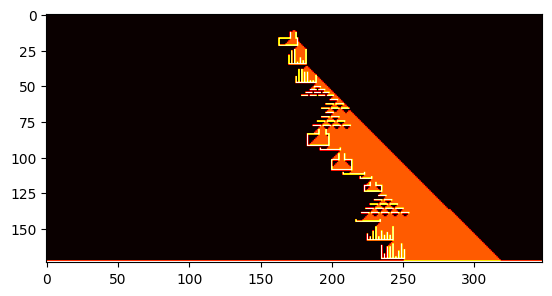

After 10000 step


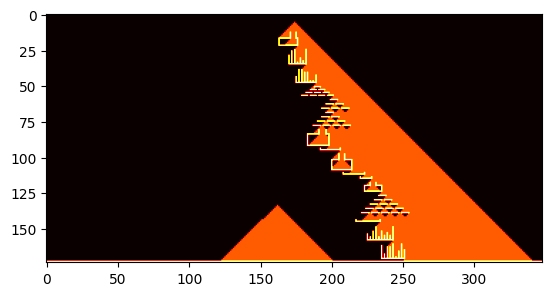

After 15000 step


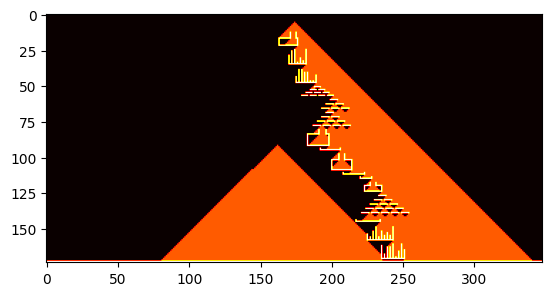

After 20000 step


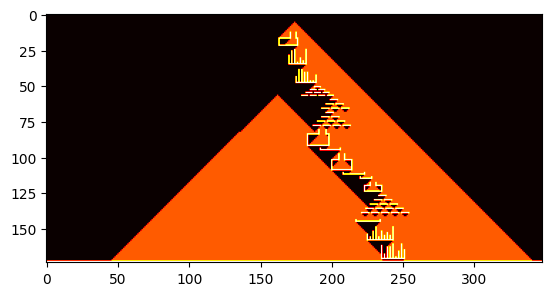

After 25000 step


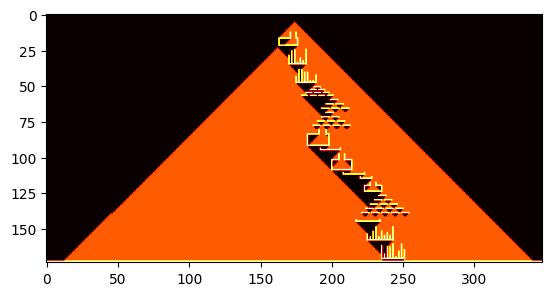

Stop after 27936 steps


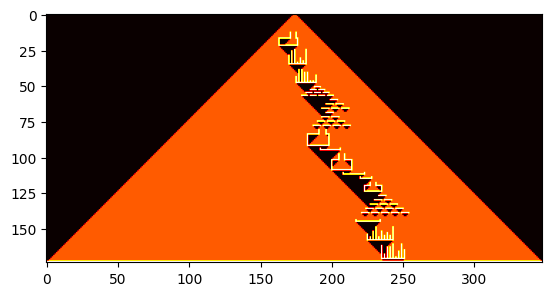

In [311]:
def move_sand(cave_reduced, sand:list):
    while True:
        # New condition to stop 
        if cave_reduced[0, sand[1]] != 0:
            return cave_reduced, True # END

        if cave_reduced[sand[0]+1, sand[1]] == 0:
            sand[0] = sand[0] + 1
        else:
            if (cave_reduced[sand[0]+1, sand[1]-1]!=0) and (cave_reduced[sand[0]+1, sand[1]+1]!=0): # Plancher
                cave_reduced[sand[0], sand[1]] = 0.5
                return cave_reduced, False # END
            elif (cave_reduced[sand[0]+1, sand[1]-1]!=0): # Semi-plancher à gauche
                sand = [sand[0]+1, sand[1]+1]
                return move_sand(cave_reduced, sand)
            else:
                sand = [sand[0]+1, sand[1]-1]
                return move_sand(cave_reduced, sand)

i=0
while True:  
    cave_reduced, is_ended = move_sand(cave_reduced, list(sand_arrival))
    if is_ended:
        print(f"Stop after {i} steps")
        plt.imshow(cave_reduced,  cmap='hot')    
        plt.show()
        break
    i+=1

    if i%5000==0:
        print(f"After {i} step")
        plt.imshow(cave_reduced,  cmap='hot')    
        plt.show()

--------
<small>Solution can be found [here](https://old.reddit.com/r/adventofcode/comments/zli1rd/2022_day_14_solutions/)